##  データ分析の趣旨
iris dataにおける'versicolor', 'virginica'を分類することを目的とし、 
説明変数にsepal length (cm)と 'petal length (cm)'をとり、簡単なEDAで仮説をたててから検証する。

In [1]:
# import module
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# import iris data
from sklearn.datasets import load_iris
iris_dataset = load_iris()
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
# Check an iris dataset
# iris_dataset

In [4]:
# mold the array of iris to dataframe
X = pd.DataFrame(np.array(iris_dataset.data)) 

In [5]:
# head
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# describe
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# nan
X.isnull().sum() 

0    0
1    0
2    0
3    0
dtype: int64

欠損値がないので、そのまま分析を進める。

In [9]:
# rename the columns
columns_dic = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

X.rename(columns= columns_dic, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# mold the array to dataframe
Y = pd.DataFrame(np.array(iris_dataset.target)) 

# rename a column
Y = Y.rename(columns = {0:'Species'})

# check the dataset
Y['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
# combine features and categorie
df_iris = X.join(Y)

# check
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
columns_process = ["sepal_length", "petal_length", "Species"]

# generate a dataframe for analyzing iris dataset
df_iris_del_index = df_iris[df_iris.Species != 0] # virgicolor and virginica

#　analysis about 'versicolor', 'virginica'
df_train_test = df_iris_del_index.loc[:, columns_process]
df_train_test['Species'] -= 1
df_train_test['Species'].unique()

array([0, 1])

<Figure size 1080x1080 with 0 Axes>

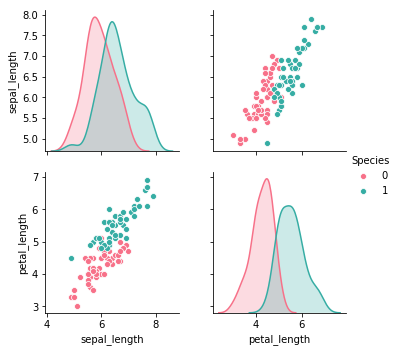

In [13]:
'''
Overview the histgram and plot
'''
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))

sns.pairplot(df_train_test, vars=df_train_test.iloc[:,:2].columns, 
             hue="Species", palette="husl")

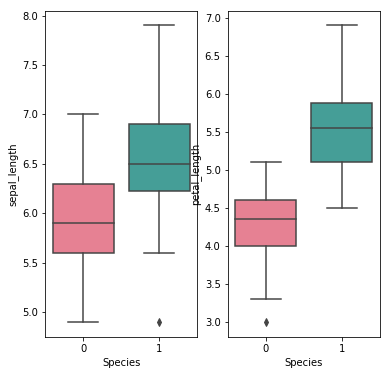

In [14]:
# plot box plot
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x="Species", y="sepal_length", 
                  data=df_train_test, palette="husl") 
ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(x="Species", y="petal_length", 
                  data=df_train_test, palette="husl")

In [15]:
# individual variable and non-dividual variable
X = df_train_test.iloc[:, :-1].values # by number/ values --> serries
y = df_train_test.loc[:, "Species"].values # by column's name

# for spliting train and test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

In [16]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

仮説】
予測モデルは、"petal_length"が5cm前後で、'versicolor', 'virginica'が分類される。 
"sepal_lenth"では、6.3cm前後で分類できるように見えるが、"petal_length"に比べ、信頼区間の精度は劣るのではないか。

###### 【検証方法】
K-means分析を用い、適切なパラメータを求め、二種分類の式を作成する。

## スクラッチによる実装

### 【問題1】K-meansクラスの作成
非階層クラスタリングの手法であるK-meansのクラスを作成してください。名前はScratchKMeansとしてください。
<br>教師なし学習であるクラスタリングになるため、ここまでの回帰や分類とは異なるパイプラインを作成することになります。
<br>メソッドやパラメータなどはscikit-learnを参考にしてください。
<br>sklearn.cluster.KMeans — scikit-learn 0.20.0 documentation
<br>検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [17]:
import numpy as np
import itertools

class ScratchKMeans():
    
    def __init__(self, n_cluster=2, max_iter=300, random_seed=1):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)
        
    def fit(self, X):

        # dicide random centroid
        cycle = itertools.cycle(range(self.n_cluster))
        self.labels_ = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype=np.int)
        self.random_state.shuffle(self.labels_)
        
        # initialize
        labels_prev = np.zeros(X.shape[0])
        count = 0
        self.centroid_ = np.zeros((self.n_cluster, X.shape[1]))
        self.distance = np.zeros((X.shape[0], self.n_cluster))
        
        while count < self.max_iter:
            for i in range(self.n_cluster):
                X_choice = X[self.labels_ == i, :]
                # decide centroid
                cent = X_choice.mean(axis=0)
                vector = X - cent
                self.centroid_[i] = cent 
                
                dis = np.sum(vector*vector, axis=1)
                self.distance[:, i] = dis
                
            labels_prev = self.labels_
            self.labels_ = self.distance.argmin(axis=1)
            count += 1
    
    def sse(self):
        sse = self.distance.min(axis=1).sum()
        
        return sse
            
    def predict(self, X):
        distance =  np.zeros((X.shape[0], self.n_cluster))
        for i in range(self.n_cluster):
            vector = X - self.centroid_[i]
            dis = np.sum(vector*vector, axis=1)
            distance[:, i] = dis
            pre_labels = distance.argmin(axis=1)
            
        return pre_labels

In [18]:
clf = ScratchKMeans(max_iter=1000)
clf.fit(X)
clf.predict(X)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

アイリスデータに関しても、データを出力し試しに決定領域を描いてみる

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the decision area of the model learned by binary classification with two dimensional 
    feature quantity.
     The color of the background is drawn from the estimated value by the learned model.
     The point of the scatter diagram is learning data.

     Parameters
     ------------------
     X_train: ndarray, shape (n_samples, 2)
         Characteristic quantity of learning data
     y_train: ndarray, shape (n_samples,)
         Correct value of learning data
     model: object
         **** Insert Instantus of the learned model
     step: float, (default: 0.1)
         Set interval to calculate estimated value
     title: str
         Give the text of the title of the graph
     xlabel, ylabel: str
         Give sentences of axis labels
     target_names =: list of str
         Give a list of legends
    """
    # define Initial setting 
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.patch.set_facecolor('skyblue')
    fig.patch.set_alpha(1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    # ax.set_yscale('log') 
    plt.grid()
    
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot setting title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='g', linewidths=5, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=150, color=scatter_color[i], label=target_names[i], 
                    marker='x', alpha=0.7)
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

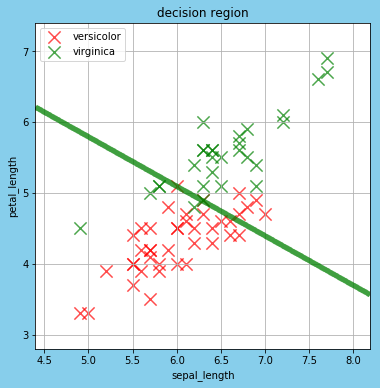

In [20]:
iris_clf = ScratchKMeans(max_iter=70)
iris_clf.fit(X_train)
y_pred = iris_clf.predict(X_test)

decision_region(X_train, y_train, iris_clf, xlabel='sepal_length', ylabel='petal_length')

上手いところで線が引けていそうなので、各数値も確認してみる

In [21]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


"""

get scores: accuracy, pecision, recall, F measure

"""
def get_scores(y_test, y_pred):
    scores_array = np.hstack((accuracy_score(y_test, y_pred), 
                             precision_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)))
    return scores_array

In [22]:
get_scores(y_test, y_pred)

array([0.8       , 1.        , 0.71428571, 0.83333333])

1と０のラベルが逆になっているため、数値が小さくなってしまっているが、逆数をとれば各数値が高い事がわかる。

#### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しました。スクラッチの過程で利用してください。
このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

#### 目的関数
K-meansは以下のクラスタ内誤差平方和（SSE, Sum of Squared Errors）を最小化する 
<br>rnkとμkを求めることで学習を行います。この数式自体は学習時にはコーディングする必要がありませんが
<br>クラスタ数Kを決めるためのエルボー法で使います。エルボー法の実装は問題2で扱います。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

n : データ点のインデックス
<br>k : クラスタのインデックス
<br>Xn : n番目のデータ点
<br>μk : k番目の中心点
<br>rnk : データ点Xnがクラスタkに所属していたら1、そうでなければ0

#### 学習
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。
<br>中心点 μkを固定した上でJを最小化するrnkを選ぶ。
<br>rnkを固定した上で Jを最小化するμkを選ぶ。
<br>
<br>具体的には以下を行います。
<br>まずは中心点μkの初期値を決める。
<br>
<br>その後以下を繰り返します。
<br>データ点Xnを最も近い μkに割り当てる。
<br>中心点 μkをk番目のクラスタに割り当てられる全てのデータ点 
<br>Xnの平均値（重心）に移動する。
<br>次のどれかの条件を満たしたらこれを止めます。
<br>繰り返しが指定した回数に到達する。
<br>中心点μkと重心の差が指定した許容値以下になる。
<br>データ点 
<br>Xn のクラスタへの割り当てが変化しなくなる。
<br>さらに、ここまでの一連の流れを指定した回数繰り返す。
<br>SSEが最小になったものを最終的な学習結果とする。
<br>これで学習が完了します。
<br>考慮すべき点として、空のクラスタが生じる可能性があります。これを防ぐためには以下の動作を実装します。
<br>k番目のクラスタに割り当てられるデータ点Xnが存在しない場合、中心点μkを最も離れているデータ点の場所に移動する。
<br>繰り返し回数や許容値などのハイパーパラメータの値はscikit-learnのデフォルト値を参考にしてください。

#### ユークリッド距離
K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。
<br>ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
<br>p,q に対しては以下の数式で表現できます。

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。
<br>参考
<br>numpy.linalg.norm — NumPy v1.15 Manual

#### 初期値
K-meansの学習結果は中心点μの初期値に影響を受けます。
<br>最もシンプルな初期値の決定方法は、データ点Xnの中からランダムに 
<br>k個選ぶことです。今回はこれを実装してください。
<br>K-meansのより良い初期値の選択方法については研究が行われており、いろいろな方法が提案されています。

#### 推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。
データ点Xnに対し、学習で決まった中心点μkの元、Jを最小化する rnkを選ぶ

具体的には次のことです。
データ点Xnを最も近いμkに割り当てる。

### 【問題2】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要があるが、その判断方法としてエルボー法があります。
SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。
このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# hyper para
iter_elbow = 10

# list
sse_list =np.zeros(iter_elbow)

for i in range(iter_elbow):
    clf = ScratchKMeans(n_cluster= i+2, max_iter=300)
    clf.fit(X)
    sse_list[i] = clf.sse()

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


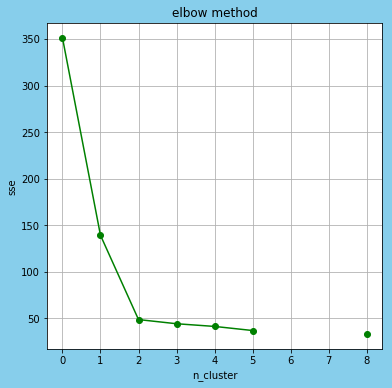

In [24]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('elbow method')
plt.xlabel('n_cluster')
plt.ylabel('sse')

plt.plot(sse_list, marker='o', color='green')

### 【問題3】（アドバンス課題）シルエット図
コーディングkを決める助けになるものとしてシルエット図もあります。
<br>Matplotlibを使い可視化するコードは用意しました。以下を与えてください。
<br>
<br>silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数
<br>silhouette_avg : float、シルエット係数の平均値
<br>y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名
<br>cluster_labels : list、クラスタのラベル名のリスト
<br>n_clusters : int、クラスタ数
<br>n番目のデータ点に対するシルエット係数 
<br>
<br>snは以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

an: 凝集度。同じクラスタ内の他のデータ点との距離の平均値。
<br>bn: 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。
<br>乖離度bが大きく、凝集度aが小さい時が理想的であり、シルエット係数sは1に近くなります。



get scores: accuracy, pecision, recall, F measure


For n_clusters = 2 The average silhouette_score is : 0.570301896345626
For n_clusters = 3 The average silhouette_score is : 0.6356855448662441
For n_clusters = 4 The average silhouette_score is : 0.7083987104616173
For n_clusters = 5 The average silhouette_score is : 0.614779893203811
For n_clusters = 6 The average silhouette_score is : 0.5169928723193439


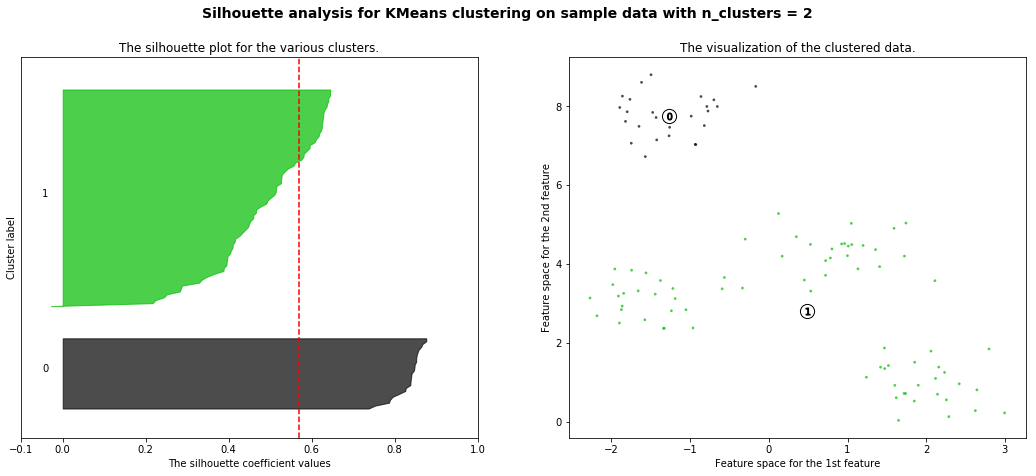

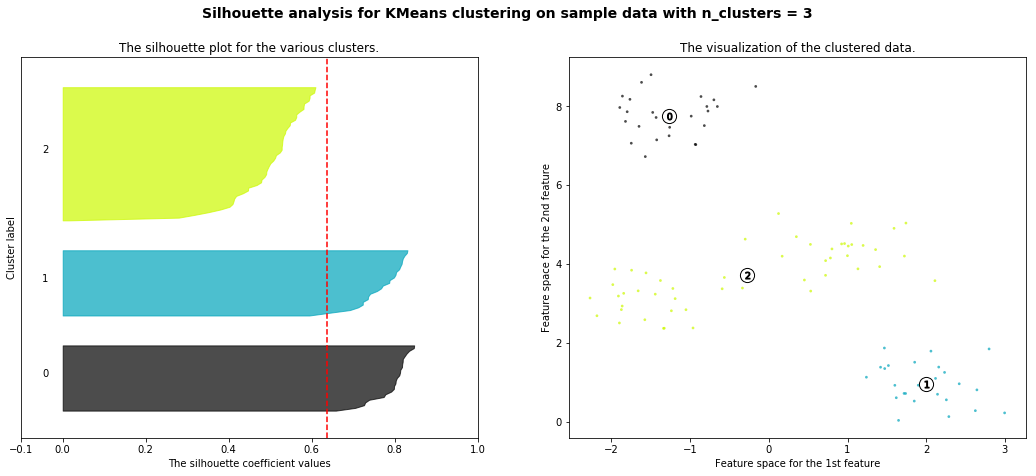

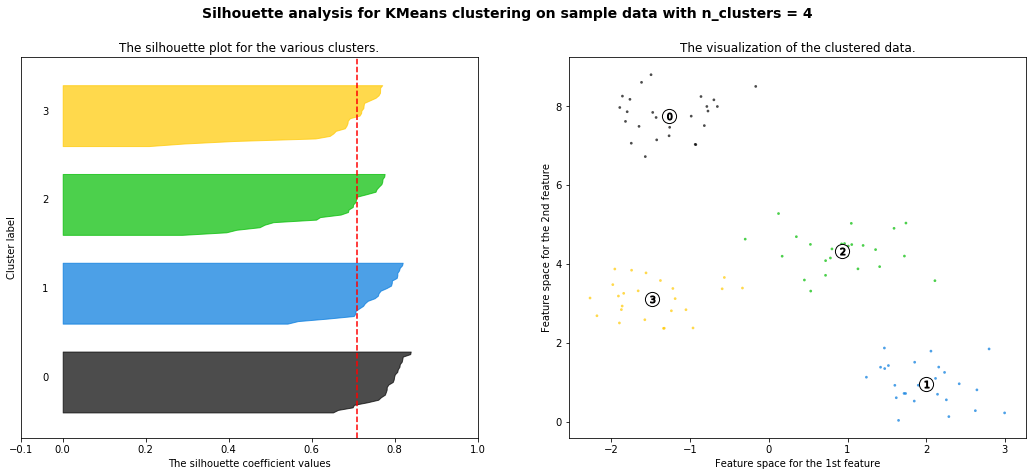

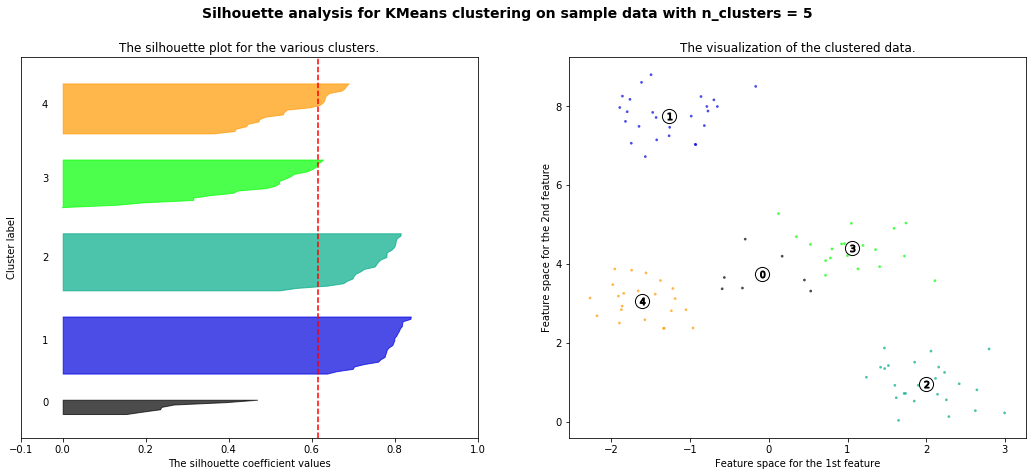

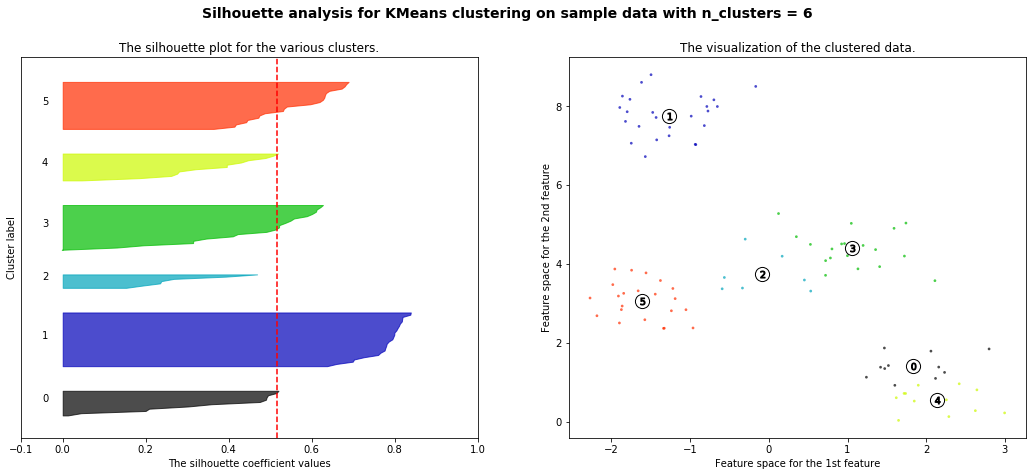

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## クラスタリング分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。
<br>UCI Machine Learning Repository: Wholesale customers Data Set
<br>Data Folderの中からWholesale customers data.csvをダウンロードしてください。
<br>これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。
<br>中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。
<br>顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

[特徴量の説明]
<br>1）FRESH：生鮮製品に対する年間支出（μｍ）（連続） 
<br>2）MILK：乳製品に対する年間支出（mu）（連続） 
<br>3）GROCERY：食料品の年間支出（mu）（連続）
<br>4）FROZEN：冷凍製品の年間支出（mu）（連続） 
<br>5）DETERGENTS_PAPER：洗剤および紙製品の年間支出（mu）（連続）
<br>6）DELICATESSEN：製品の 年間支出（mu）およびデリカテッセン製品（連続）
<br>7）CHANNEL：顧客チャンネル - Horeca（ホテル/レストラン/カフェ）またはRetailチャンネル（カテゴリ） 
<br>8）RESION：顧客地域 - リスノン、ポルトまたはその他（カテゴリ） 

In [26]:
'''
import the data
'''
%time data = pd.read_csv('Wholesale customers data.csv')

CPU times: user 4.18 ms, sys: 2.3 ms, total: 6.47 ms
Wall time: 5.25 ms


In [27]:
# head
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [29]:
# describe
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [30]:
# nan
data.isnull().sum() 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

欠損値がないのでそのまま分析を進める

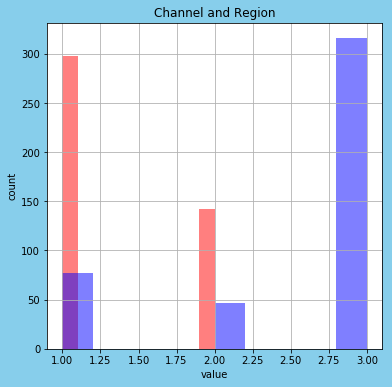

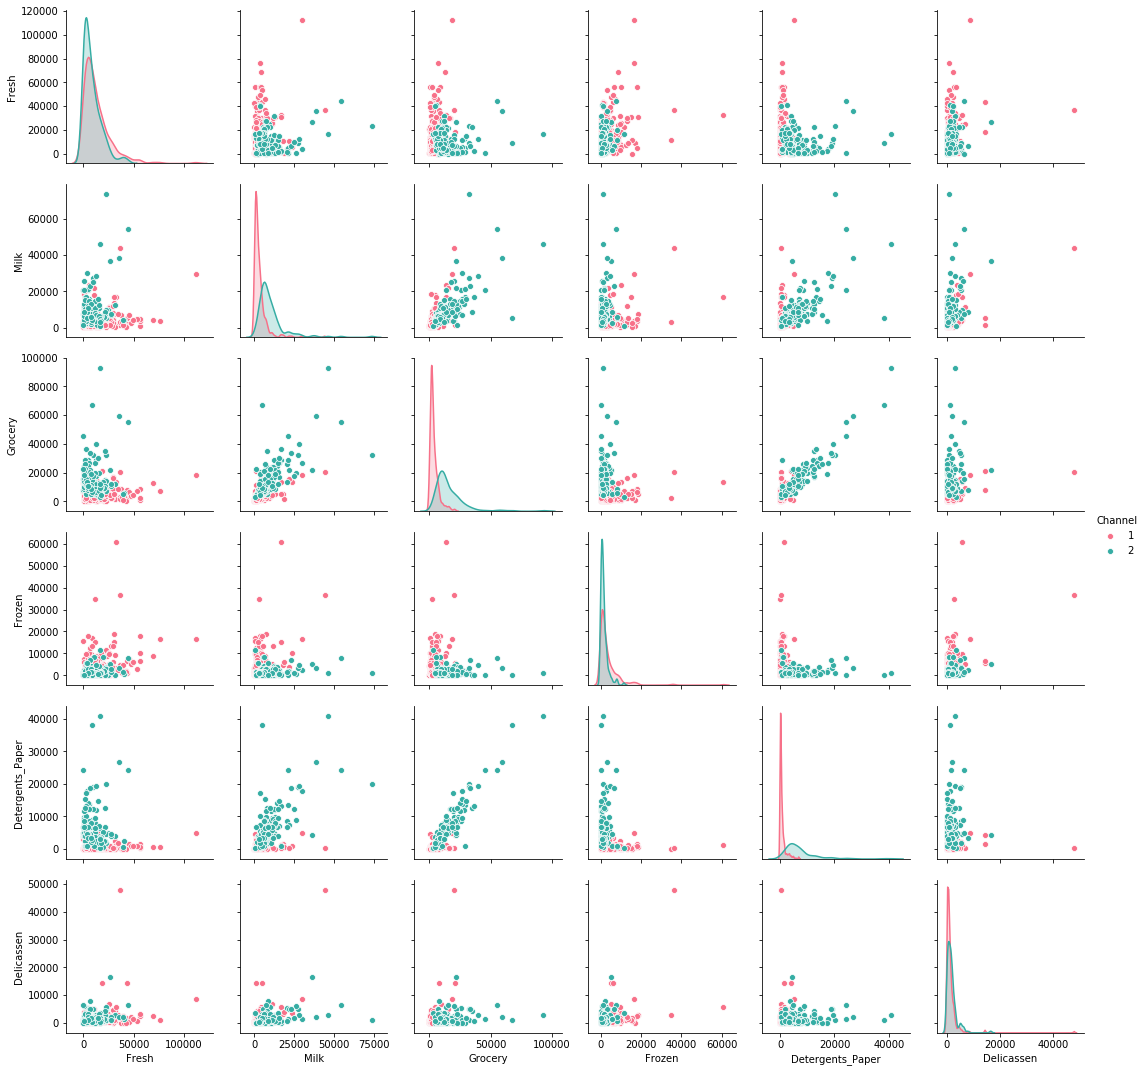

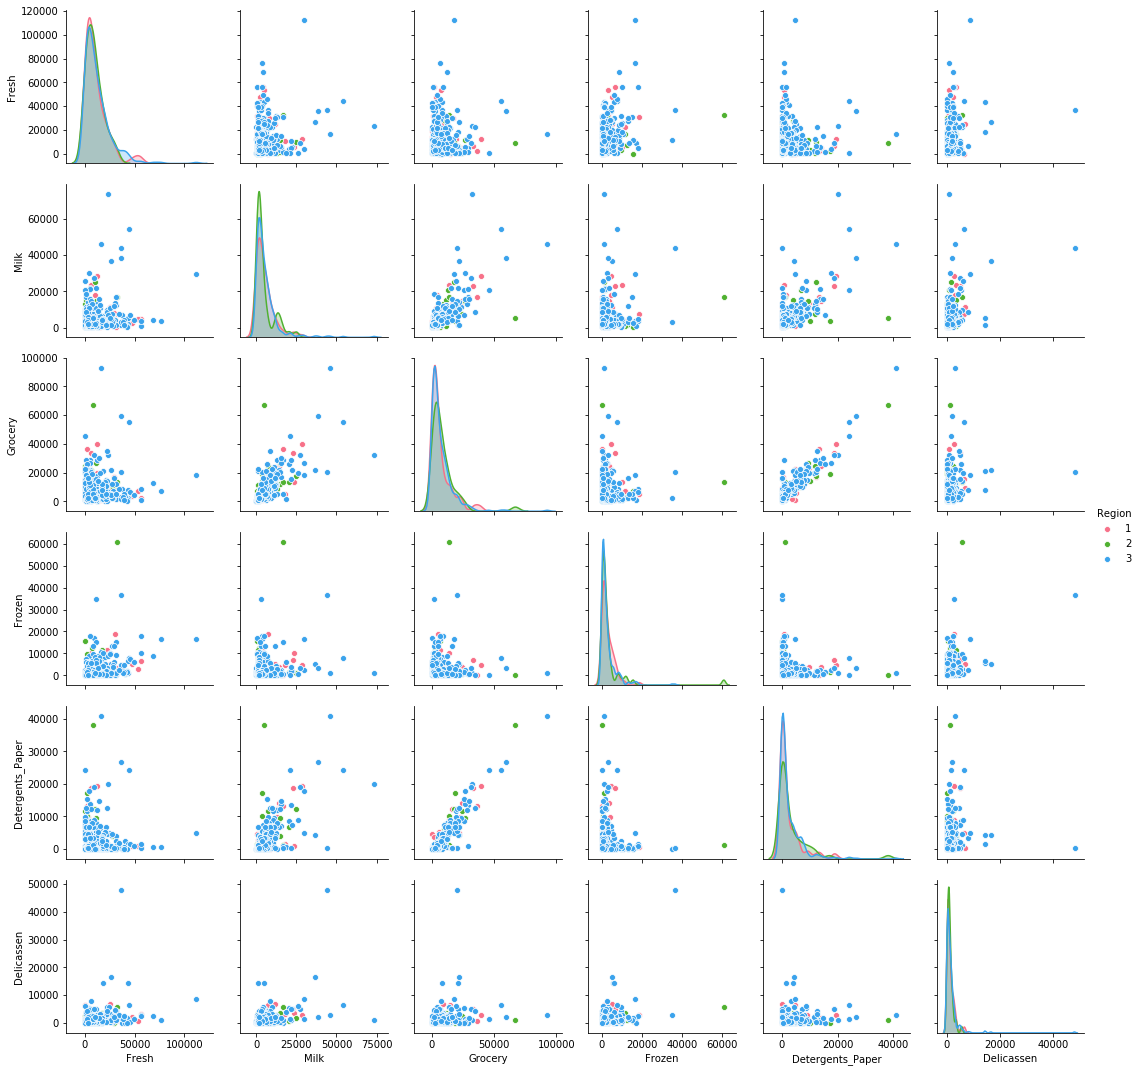

In [31]:
import seaborn as sns

data_X = data.iloc[:, 2:]
data_y = data.iloc[:, :2]

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('Channel and Region')
plt.xlabel('value')
plt.ylabel('count')

plt.hist(data_y['Channel'], color='red', alpha=0.5, label="Channel")
plt.hist(data_y['Region'], color='blue',alpha=0.5, label="Region")
# plt.legend([p1, p2],["Channel", "Region"], loc=1) 

sns.pairplot(data, vars=data.iloc[:,2:].columns, 
             hue="Channel",  palette="husl")
sns.pairplot(data, vars=data.iloc[:,2:].columns, 
             hue="Region",  palette="husl")

#### [仮説]
'Channel'や'Region'では、各指標は明確に分類することは困難である。
<br>'Channel'においては、１〜２の値をとるが1に片寄ってより、'Region'においては、１〜３の値をとるが3にかなり片寄っている。
<br>ここでは、２次元での分類が困難であるため、３クラスター以上の分類が適切だと考えられる。
<br>また、‘Detergents_Paper’以外は非常に似通った散布図のため、さらに多いクラスター数でないと、分類できないと考えられる。
<br>また、クライエントの業績にインパクトを与えるのは、地域ではないかと仮説し、検証する。

In [32]:
bclf = ScratchKMeans(n_cluster=4, max_iter=1000)
bclf.fit(data_X.values)
pre_bclf = bclf.predict(data_X.values)
pre_bclf

array([0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2,
       0, 2, 2, 3, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 3, 3, 1,
       0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。
<br>これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。
<br>
<br>PCAのサンプルコード

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_X)
data_pca = pca.transform(data_X)

PCAの分散説明率を表示するコードサンプル

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


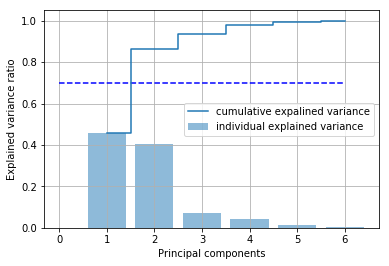

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')

plt.legend(loc='best')
plt.grid()
plt.show()

### 【問題4】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# hyper para
iter_elbow = 10

# list
sse_list =np.zeros(iter_elbow)

for i in range(iter_elbow):
    clf = ScratchKMeans(n_cluster= i+2, max_iter=300)
    clf.fit(data_X.values)
    sse_list[i] = clf.sse()

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


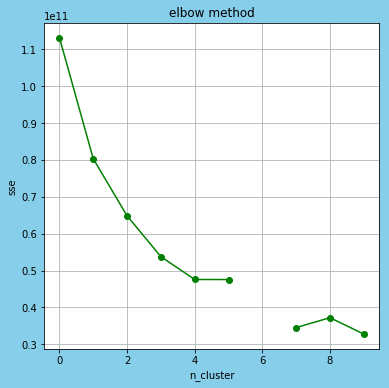

In [36]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('elbow method')
plt.xlabel('n_cluster')
plt.ylabel('sse')

plt.plot(sse_list, marker='o', color='green')

エルボー法で検討する。クラスター数4の時点で急に落ち込んでいるため、クラスター数は7に指定するのが良いと考えられる。
<br>仮説では、データの形式からクラスター数は3つ以上だと考えていたので適当であると考えられる。

### 【問題5】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

(array([ 77.,   0.,   0.,   0.,   0.,  47.,   0.,   0.,   0., 316.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

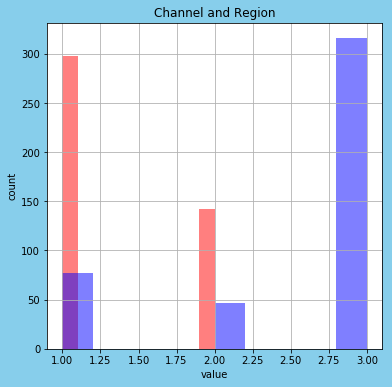

In [37]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('Channel and Region')
plt.xlabel('value')
plt.ylabel('count')

plt.hist(data_y['Channel'], color='red', alpha=0.5, label="Channel")
plt.hist(data_y['Region'], color='blue',alpha=0.5, label="Region")

In [38]:
pre_bclf = pd.DataFrame(pre_bclf).copy()
data_processing = pd.concat([data, pre_bclf], axis=1)
data_processing.rename(columns={0:'Kmean'}, inplace=True)
data_processing.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmean
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [39]:
add_feature = pd.DataFrame(data_pca)
data_process = pd.concat([data_processing, add_feature], axis=1)
data_process.rename(columns={0:'Feature1', 1:'Feature2'}, inplace=True)
data_process.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmean,Feature1,Feature2
0,2,3,12669,9656,7561,214,2674,1338,0,650.022122,1585.519090
1,2,3,7057,9810,9568,1762,3293,1776,2,-4426.804979,4042.451509
2,2,3,6353,8808,7684,2405,3516,7844,0,-4841.998707,2578.762176
3,1,3,13265,1196,4221,6404,507,1788,0,990.346437,-6279.805997
4,2,3,22615,5410,7198,3915,1777,5185,1,10657.998731,-2159.725815


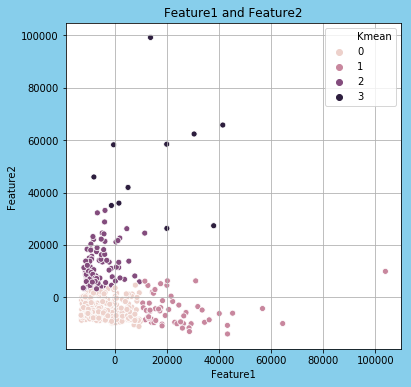

In [40]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('Feature1 and Feature2')
plt.xlabel('value')
plt.ylabel('count')

sns.scatterplot(x="Feature1", y="Feature2", hue="Kmean", data=data_process)

In [41]:
data_process.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmean,Feature1,Feature2
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,0.600286,-1.153249e-01,6.259715e-01
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,0.004453,5.522516e-02,8.962802e-03
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.058733,9.918053e-01,-1.054801e-01
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.643315,2.109131e-01,8.428778e-01
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.753280,8.318187e-02,9.703530e-01
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.005795,4.031445e-01,-4.651424e-02
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.712690,-1.900464e-02,9.241597e-01
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.266013,3.102047e-01,2.441027e-01
Kmean,0.600286,0.004453,0.058733,0.643315,0.753280,-0.005795,0.712690,0.266013,1.000000,1.373388e-01,7.566191e-01
Feature1,-0.115325,0.055225,0.991805,0.210913,0.083182,0.403144,-0.019005,0.310205,0.137339,1.000000e+00,-9.531215e-17


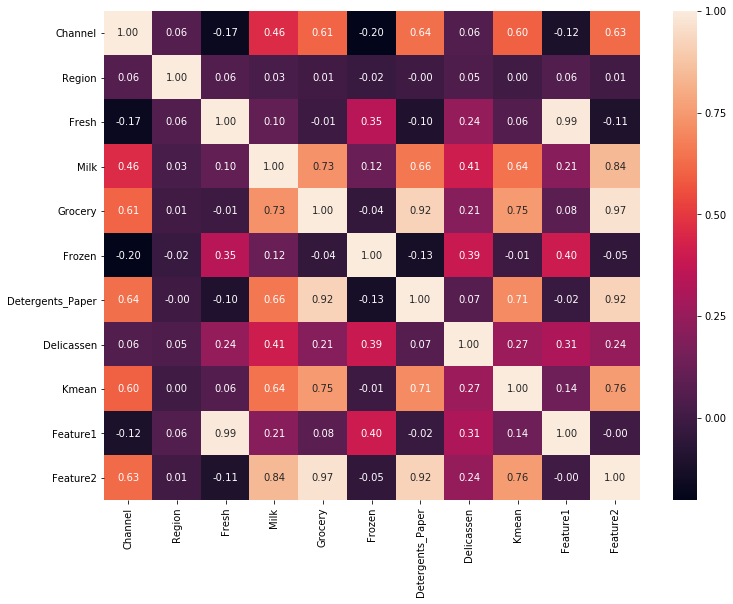

In [42]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(data_process.corr(), annot=True, fmt="1.2f")

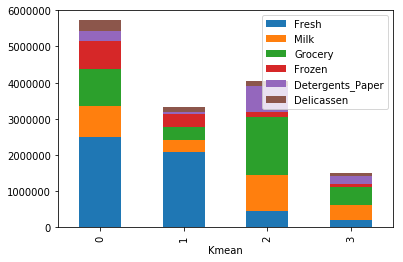

In [43]:
data_summary = data_process.groupby(['Kmean']).sum()


data_summary.iloc[:, 2:8].plot(kind="bar", stacked=True)

### 【問題6】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。
ヒント
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。
条件ごとにデータを見る際にはPandasのgroupbyが便利です。
pandas.DataFrame.groupby — pandas 0.23.4 documentation

#### [検証]
次元削減して作成した特徴量１は、Freshとの相関が0.99, 特徴量２は、Groceryとの相関が0.97と非常に高く、
<br>ほぼ同様の指標となる事がわかる。以上から他全ての調査をするよりもFreshとGroceryを調査した方が、経費は少なくて済む。
<br>
<br>地域によって、大きい影響があるのではないかと仮説で論じていたが、関係性は見られなかった。

## 他の非階層クラスタリング手法

### 【問題7】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
<br>PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。
<br>DBSCANのメリット・デメリット
<br>t-SNE、LLEのメリット・デメリット
<br>について記述してください。

<br>DBSCAN - 非階層クラスタリング
<br>メリット k-meansと違って，最初にクラスタ数を決めなくてよい とがったクラスタでも分類できる。
<br>クラスタが球状であることを前提としない 非線形でクラスタリングできる。
<br>
<br>デメリット 計算コストが高い、データがわからないとハイパーパラメーターεを決めるのが難しい。
<br>
<br>t-SNE　- 次元削減
<br>PCAでは高次元空間上で非線形構造を持っているデータに対しては適切な低次元表現が得られないがそこを改善した。
<br>
<br>デメリット うまくいくことが保証されているのは2or3次元への圧縮のみ 局所構造が次元の呪いの影響を受けやすい 最適化アルゴリズムの収束性が保証されていない
<br>
<br>LLE
<br>非線形次元圧縮ができる

### 【問題8】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。
<br>そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。
<br>
<br>sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation
<br>sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation
<br>
<br>パラメーターチューニング
<br>これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

<br>t-SNEの論文
<br>DBSCANの論文

In [44]:
from sklearn.manifold import TSNE
ts = TSNE()
data_tsne = ts.fit_transform(data_X)

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2)
dbk = db.fit_predict(data_tsne)

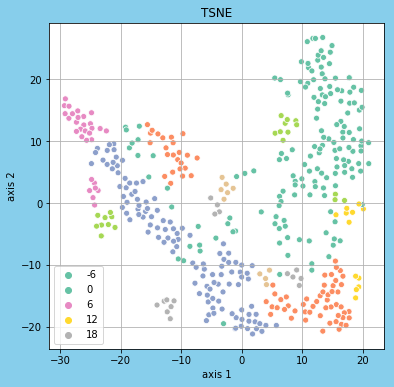

In [46]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid() 

# plot setting title
plt.title('TSNE')
plt.xlabel('axis 1')
plt.ylabel('axis 2')

sns.scatterplot(data_tsne[:, 0], data_tsne[:, 1], hue=dbk, palette='Set2')

## ディスカッション

### 【問題9】教師なし学習と教師あり学習
<br>最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
<br>教師なし学習は教師あり学習とどのような違いがあるか
<br>
<br>注意点
<br>答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。

・解釈した後、モデルを作成し、予測するのが教師あり学習で、モデルを作成し後に解釈し、予測するのが教師なし学習